# Walmart Sales (2010 - 2012): EDA Part I

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import module.global_plot_functions as gp

sns.set()

In [2]:
# load data
stores = pd.read_pickle('out/stores.pkl')
features = pd.read_pickle('out/features.pkl')
sales = pd.read_pickle('out/sales.pkl')
store_sales = pd.read_pickle('out/store_sales.pkl')

## Statistics

In [3]:
# save statistics info to excel file
sales.describe().to_csv('out/stats_sales.csv')
stores.describe().to_csv('out/stats_stores.csv')
store_sales.describe().to_csv('out/stats_store_sales.csv')
features.describe().to_csv('out/stats_features.csv')

## Data Distribution

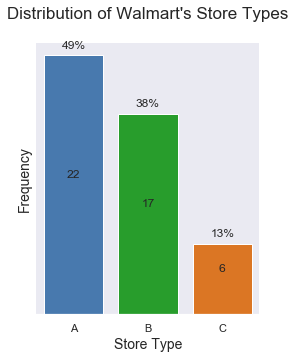

In [4]:
# plot distribution of Store Type

fig, ax = plt.subplots(figsize=(4, 5))

# color pallete for store type
colors = ["windows blue", "green", "orange"]
color_palette = sns.xkcd_palette(colors)

# draw bar plot
_ = sns.countplot(x='Type', data=stores, ax=ax, palette=color_palette)

gp.hide_borders(ax, ['left', 'top', 'right'])
gp.annotate_plot(ax, n=len(stores['Store']))
plt.yticks([])
plt.xlabel('Store Type', size=14)
plt.ylabel('Frequency', size=14)
plt.title("Distribution of Walmart's Store Types\n", size=17)
plt.show()

In [5]:
def barplot_by_rank(df_in, by='', title='', suptitle='', xlabel='', ylabel='',
                    n=10, rank='largest', palette='', figsize=(12, 8), annotate=True, hide_yticks=True):
    
    x_col = df_in.columns[0]
    y_col = df_in.columns[1]
    xlabel = x_col if xlabel == '' else xlabel
    ylabel = y_col if ylabel == '' else ylabel
    by = y_col if by == '' else by
    
    if rank == 'largest':
        data = df_in.nlargest(n, by)
    else:
        data = df_in.nsmallest(n, by)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    _ = sns.barplot(x_col, y_col, data=data, order=data[x_col], ax=ax)
    
    gp.hide_borders(ax, ['left', 'top', 'right'])
    gp.annotate_plot(ax, n=sum(stores[y_col]), pct_precision=2, annotate=annotate)
    
    if hide_yticks == True:
        plt.yticks([])
    
    plt.xlabel(xlabel, size=14)
    plt.ylabel(ylabel, size=14)
    plt.title(title, size=17)
    plt.suptitle(suptitle, size=14)
    plt.show()

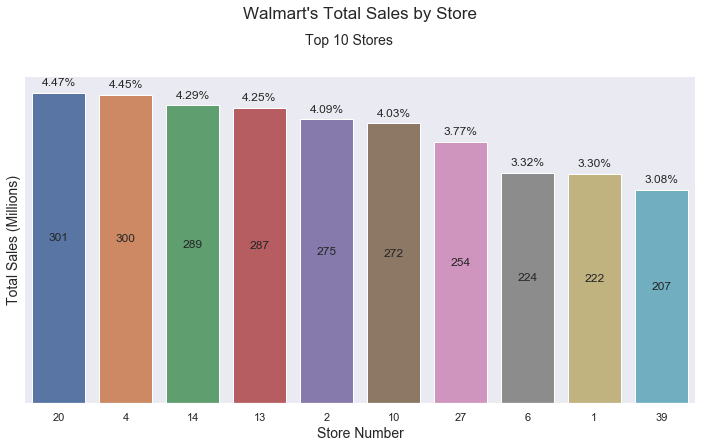

In [6]:
# bar plot of top 10 stores with highest total sales
barplot_by_rank(stores[['Store', 'Total Sales (Millions)']], title="Walmart's Total Sales by Store\n\n\n", 
                suptitle='Top 10 Stores', xlabel='Store Number')

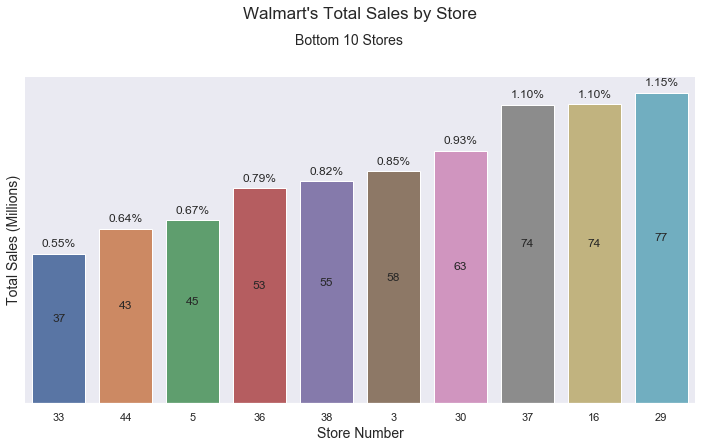

In [7]:
# bar plot of bottom 10 stores with lowest total sales
barplot_by_rank(stores[['Store', 'Total Sales (Millions)']], title="Walmart's Total Sales by Store\n\n\n", 
                suptitle='Bottom 10 Stores', xlabel='Store Number', rank='smallest')

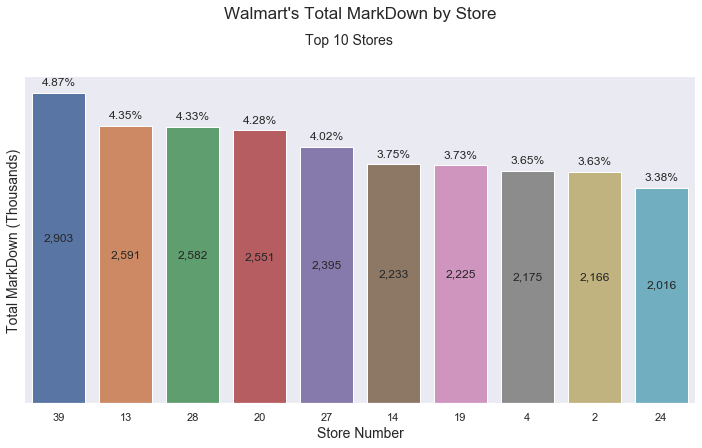

In [8]:
# bar plot of top 10 stores with highest total markdown
barplot_by_rank(stores[['Store', 'Total MarkDown (Thousands)']], title="Walmart's Total MarkDown by Store\n\n\n", 
                suptitle='Top 10 Stores', xlabel='Store Number')

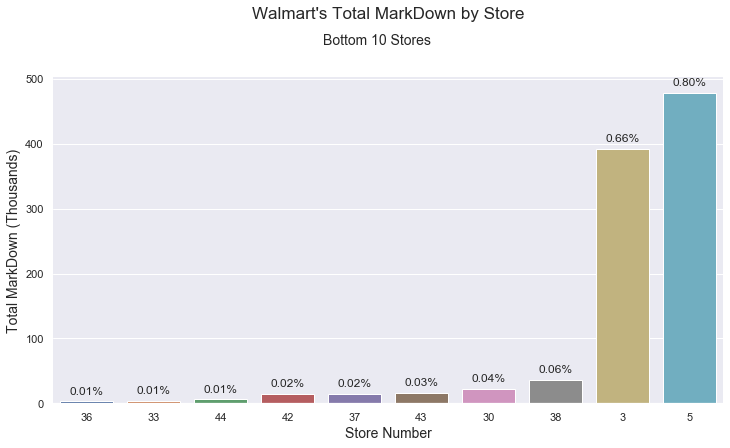

In [9]:
# bar plot of top 10 stores with highest total markdown
barplot_by_rank(stores[['Store', 'Total MarkDown (Thousands)']], title="Walmart's Total MarkDown by Store\n\n\n", 
                suptitle='Bottom 10 Stores', xlabel='Store Number', rank='smallest', annotate=False,
                hide_yticks=False)

In [10]:
dept_sales = sales.groupby(by=['Store', 'Dept'])['Weekly Sales (Thousands)'].sum().to_frame().reset_index()
dept_sales['Total Sales (Millions)'] = dept_sales['Weekly Sales (Thousands)'] / 1000
del dept_sales['Weekly Sales (Thousands)']

In [11]:
dept_sales.head()

,Store,Dept,Total Sales (Millions)
0,1,1,3.219405
1,1,2,6.592599
2,1,3,1.880518
3,1,4,5.285874
4,1,5,3.468886


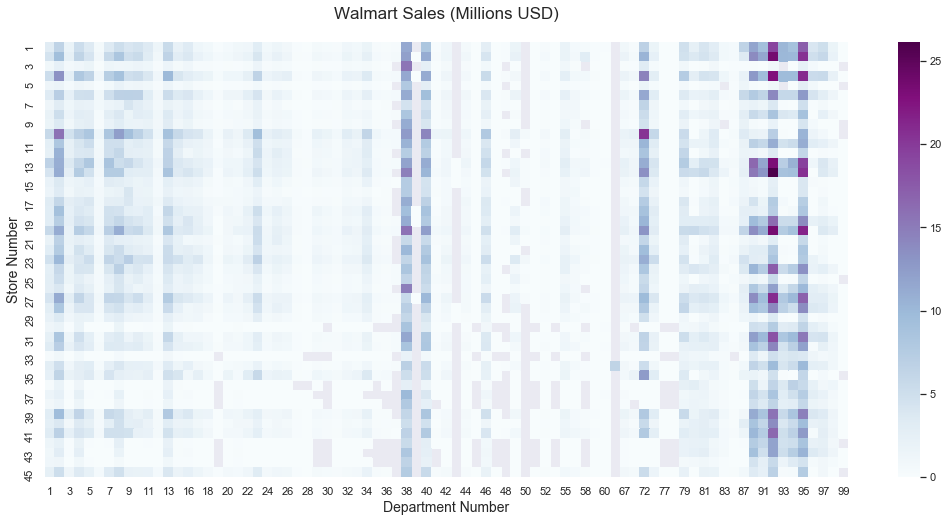

In [12]:
fig, ax = plt.subplots(figsize=(18, 8))
_ = sns.heatmap(dept_sales.pivot(index='Store', columns='Dept', values='Total Sales (Millions)'), cmap="BuPu")
plt.xlabel('Department Number', size=14)
plt.ylabel('Store Number', size=14)
plt.title('Walmart Sales (Millions USD)\n', size=17)
plt.show()

## Relationship Between Variables

In [13]:
def scatterplot(df_in, title='', xlabel='', ylabel='', figsize=(8, 6)):
    '''Scatter plot of x vs. y'''
    
    fig, ax = plt.subplots(figsize=figsize)
    X = df_in[df_in.columns[0]]
    Y = df_in[df_in.columns[1]]
    _ = sns.scatterplot(x=X, y=Y, hue=df_in[df_in.columns[2]], s=90, ax=ax)
    corr = round(X.corr(Y), 4)  # compute correlation
    gp.hide_borders(ax, ['top', 'right'])
    plt.legend(loc='best', frameon=False)
    
    if xlabel == '':
        plt.xlabel(df_in.columns[0], size=14)
    else:
        plt.xlabel(xlabel, size=14)
    
    if ylabel == '':
        plt.ylabel(df_in.columns[1], size=14)
    else:
        plt.ylabel(ylabel, size=14)
    
    plt.title(title, size=17)
    plt.suptitle(df_in.columns[0] + ' vs. ' + df_in.columns[1] + \
                 '\nCorrelation: ' + str(corr), size=14)
    plt.show()

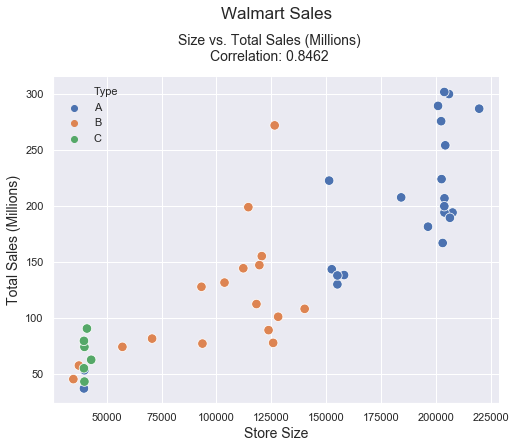

In [14]:
scatterplot(stores[['Size', 'Total Sales (Millions)', 'Type']], title='Walmart Sales\n\n\n', xlabel='Store Size')

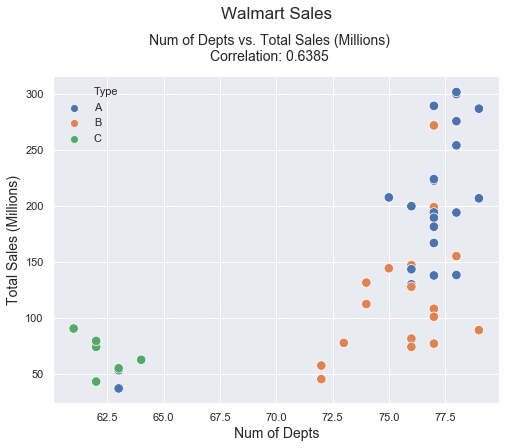

In [15]:
scatterplot(stores[['Num of Depts', 'Total Sales (Millions)', 'Type']], title='Walmart Sales\n\n\n')

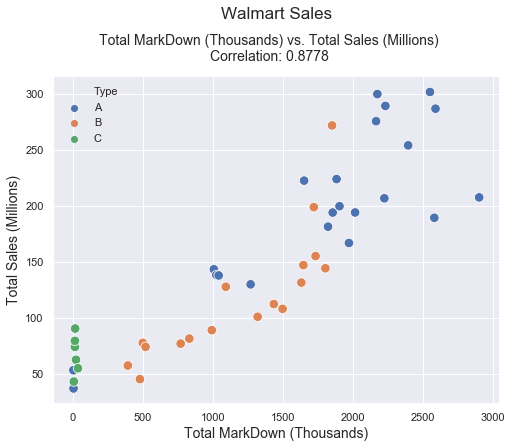

In [16]:
scatterplot(stores[['Total MarkDown (Thousands)', 'Total Sales (Millions)', 'Type']], title='Walmart Sales\n\n\n')

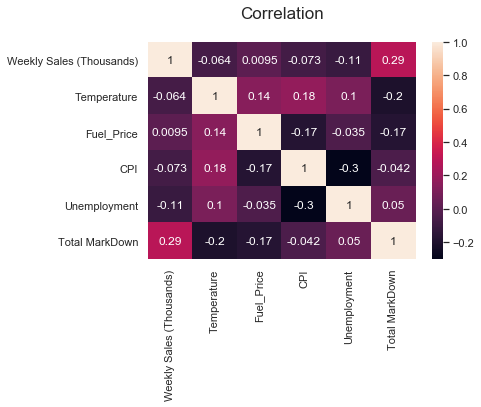

In [17]:
_ = sns.heatmap(store_sales[['Weekly Sales (Thousands)', 'Temperature', 'Fuel_Price', 'CPI', \
                             'Unemployment', 'Total MarkDown']].corr(), annot=True)
plt.title('Correlation\n', size=17)
plt.show()